# Module 4 Assignment

This data is collected by volunteers across the city, and is meant to catalog information about every single tree in the city.
Build a dash app for a arborist studying the health of various tree species (as defined by the variable ‘spc_common’) across each borough (defined by the variable ‘borough’). This arborist would like to answer the following two questions for each species and in each borough:


1. What proportion of trees are in good, fair, or poor health according to the ‘health’ variable ?


In [36]:

import pandas as pd
import numpy as np
import plotly
import json
import colorlover as cl
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
import dash
import dash_core_components as dcc
import dash_html_components as html

url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json'
trees = pd.read_json(url)
subtree = trees[['spc_common','health','boroname']]
subtree['spc_common'].fillna('Unknown',inplace = True)
subtree.dropna(inplace = True)

# list health conditions
h_stat = list(set(subtree['health']))
print(h_stat)

colors = ['blue','green','red']


# tree health condition column
for status in set(subtree['health']):
    subtree[status] = np.where(subtree['health']==status,1,0)
    
subtree = pd.DataFrame(subtree.groupby(['boroname','spc_common']).sum())
subtree.head()

# list the boroughs
boroughs = list(set(trees['boroname']))

subtree['total'] = subtree.sum(axis=1)
for column in list(subtree.columns):
    subtree[column] = (subtree[column]/subtree['total'])*100
subtree.head()


# store data for each borough
trace_list=[]

borough_list = list(map(lambda x: str(x), boroughs))

# number of columns and rows
cols=len(boroughs)

rows=1
fig = tools.make_subplots(rows=rows, cols=cols, subplot_titles=tuple(borough_list))

#iterate through boroughs
for borough in boroughs:
        for i in range(0,len(h_stat)):
            trace = go.Bar(
            x = list(subtree.loc[borough].index),
            y = list(subtree.loc[borough][h_stat[i]]),
            name = h_stat[i],
            marker=dict(color=colors[i])
            )
            trace_list += [trace]



row_i = []
col_j = []
for i in range(1,rows+1):
    for j in range (1,cols+1):
        for n in range (1,4):
            row_i.append(i)
            col_j.append(j)

for i in range(0,len(trace_list)):        
     fig.append_trace(trace_list[i], row_i[i],col_j[i]) 
 
        
fig['layout'].update(showlegend=False,height=500, width=1400, title='Proportion of Trees in Health Conditions', barmode='stack')


app = dash.Dash()

colors = {
    'background': 'white',
    'text': 'black'
}

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Question #1',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Proportion of trees in Health Conditions', style={
        'textAlign': 'center',
        'color': colors['text']
    }),

       
    html.Div([
        dcc.Graph(figure=fig, id='my-figure')])
    ])




if __name__ == '__main__':
    app.run_server(debug=True)

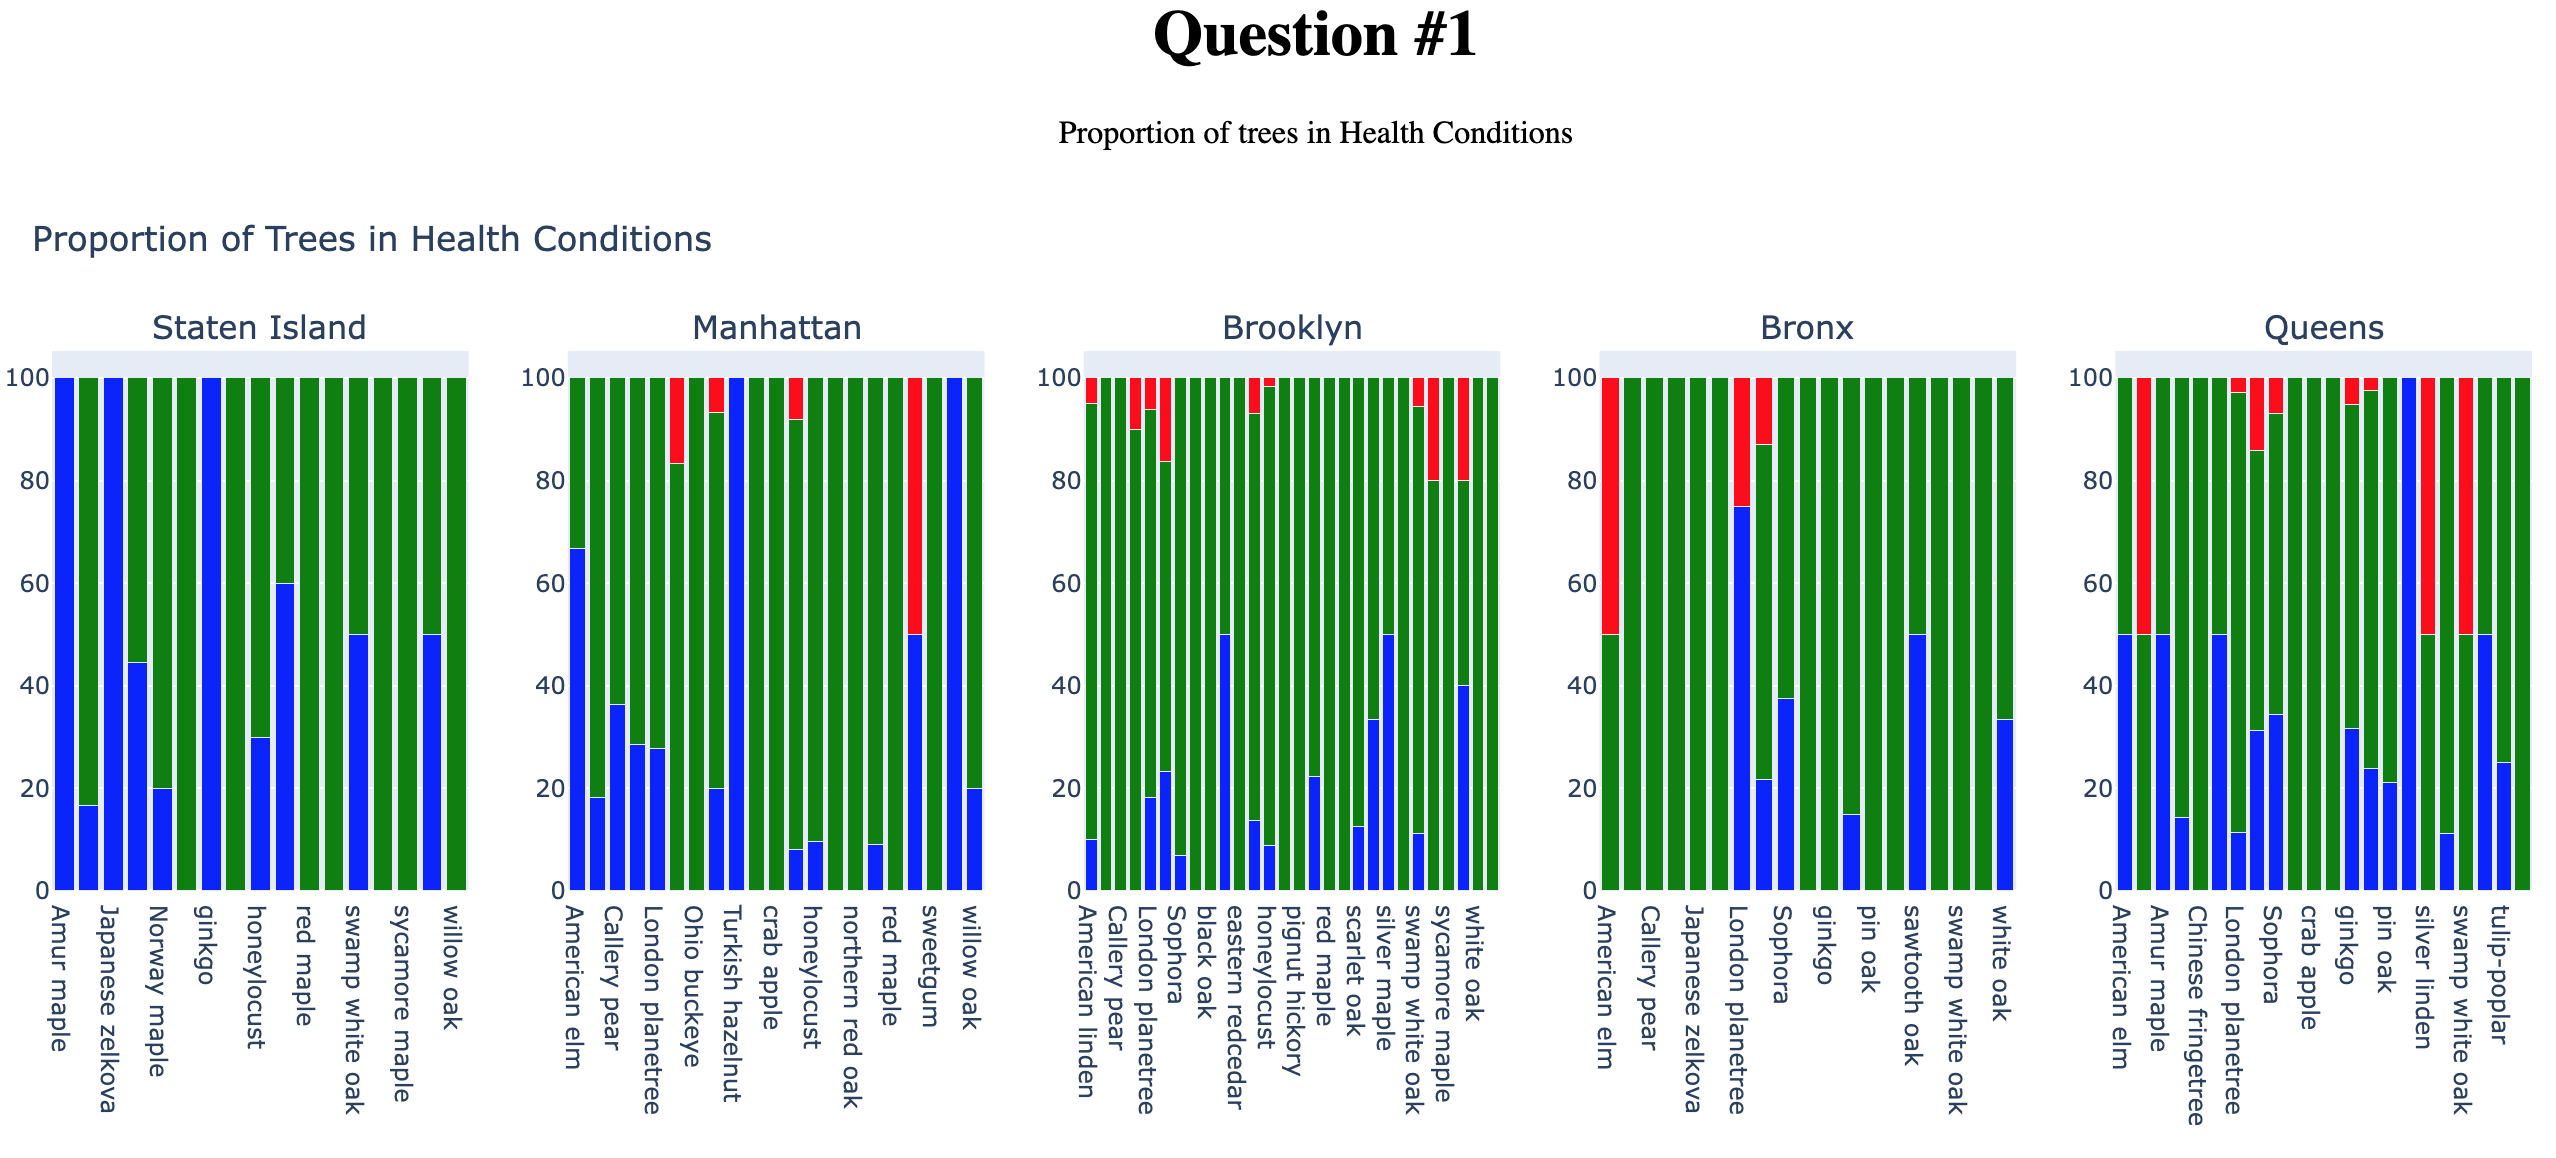

2. Are stewards (steward activity measured by the ‘steward’ variable) having an impact on the health of trees?

In [ ]:
import pandas as pd
import numpy as np
import json
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
import dash
import dash_core_components as dcc
import dash_html_components as html

url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json'
trees = pd.read_json(url)
subtree = trees[['spc_common','status','boroname']]
subtree['spc_common'].fillna('Unknown',inplace = True)

# columns for tree status
for status in set(subtree['status']):
    subtree[status] = np.where(subtree['status']==status,1,0)
    
subtree = pd.DataFrame(subtree.groupby(['boroname','spc_common']).sum())
subtree.head()

# list boroughs
boroughs = list(set(trees['boroname']))

trace_list_q2 =[]

# plot titles
borough_list = list(map(lambda x: str(x), boroughs))

subtree2 = trees[['spc_common','health','boroname','steward']]

subtree2['spc_common'].fillna('Unknown',inplace = True)
subtree2.dropna(inplace = True)
subtree2[['steward','health']] = subtree2[['steward','health']].apply(lambda x : pd.factorize(x)[0])
subtree2_cor = pd.DataFrame(subtree2.groupby(['boroname','spc_common']).corr())
fig2 = tools.make_subplots(rows=1, cols=len(boroughs), subplot_titles=tuple(borough_list))



boroughs = list(set(subtree2['boroname']))
plants = list(set(subtree2['spc_common']))

for borough in boroughs:
    trace = go.Bar(
            x = list(subtree.loc[borough].index),
            y = list(subtree2_cor.loc[borough]['steward'][::2])
            )
    trace_list_q2 += [trace]

for i in range(len(boroughs)):
    fig2.append_trace(trace_list_q2[i], 1, i+1) 


        
fig2['layout'].update(showlegend=False,height=500, width=1400, title='Proportion of Trees in Health Conditions')




app = dash.Dash()

colors = {
    'background': 'white',
    'text': 'black'
}



app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Question #2',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Correlation between stewardsand  and health of trees', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
    html.Div([
        dcc.Graph(figure=fig2, id='my-figure')
])
    ])


if __name__ == '__main__':
    app.run_server(debug=True)

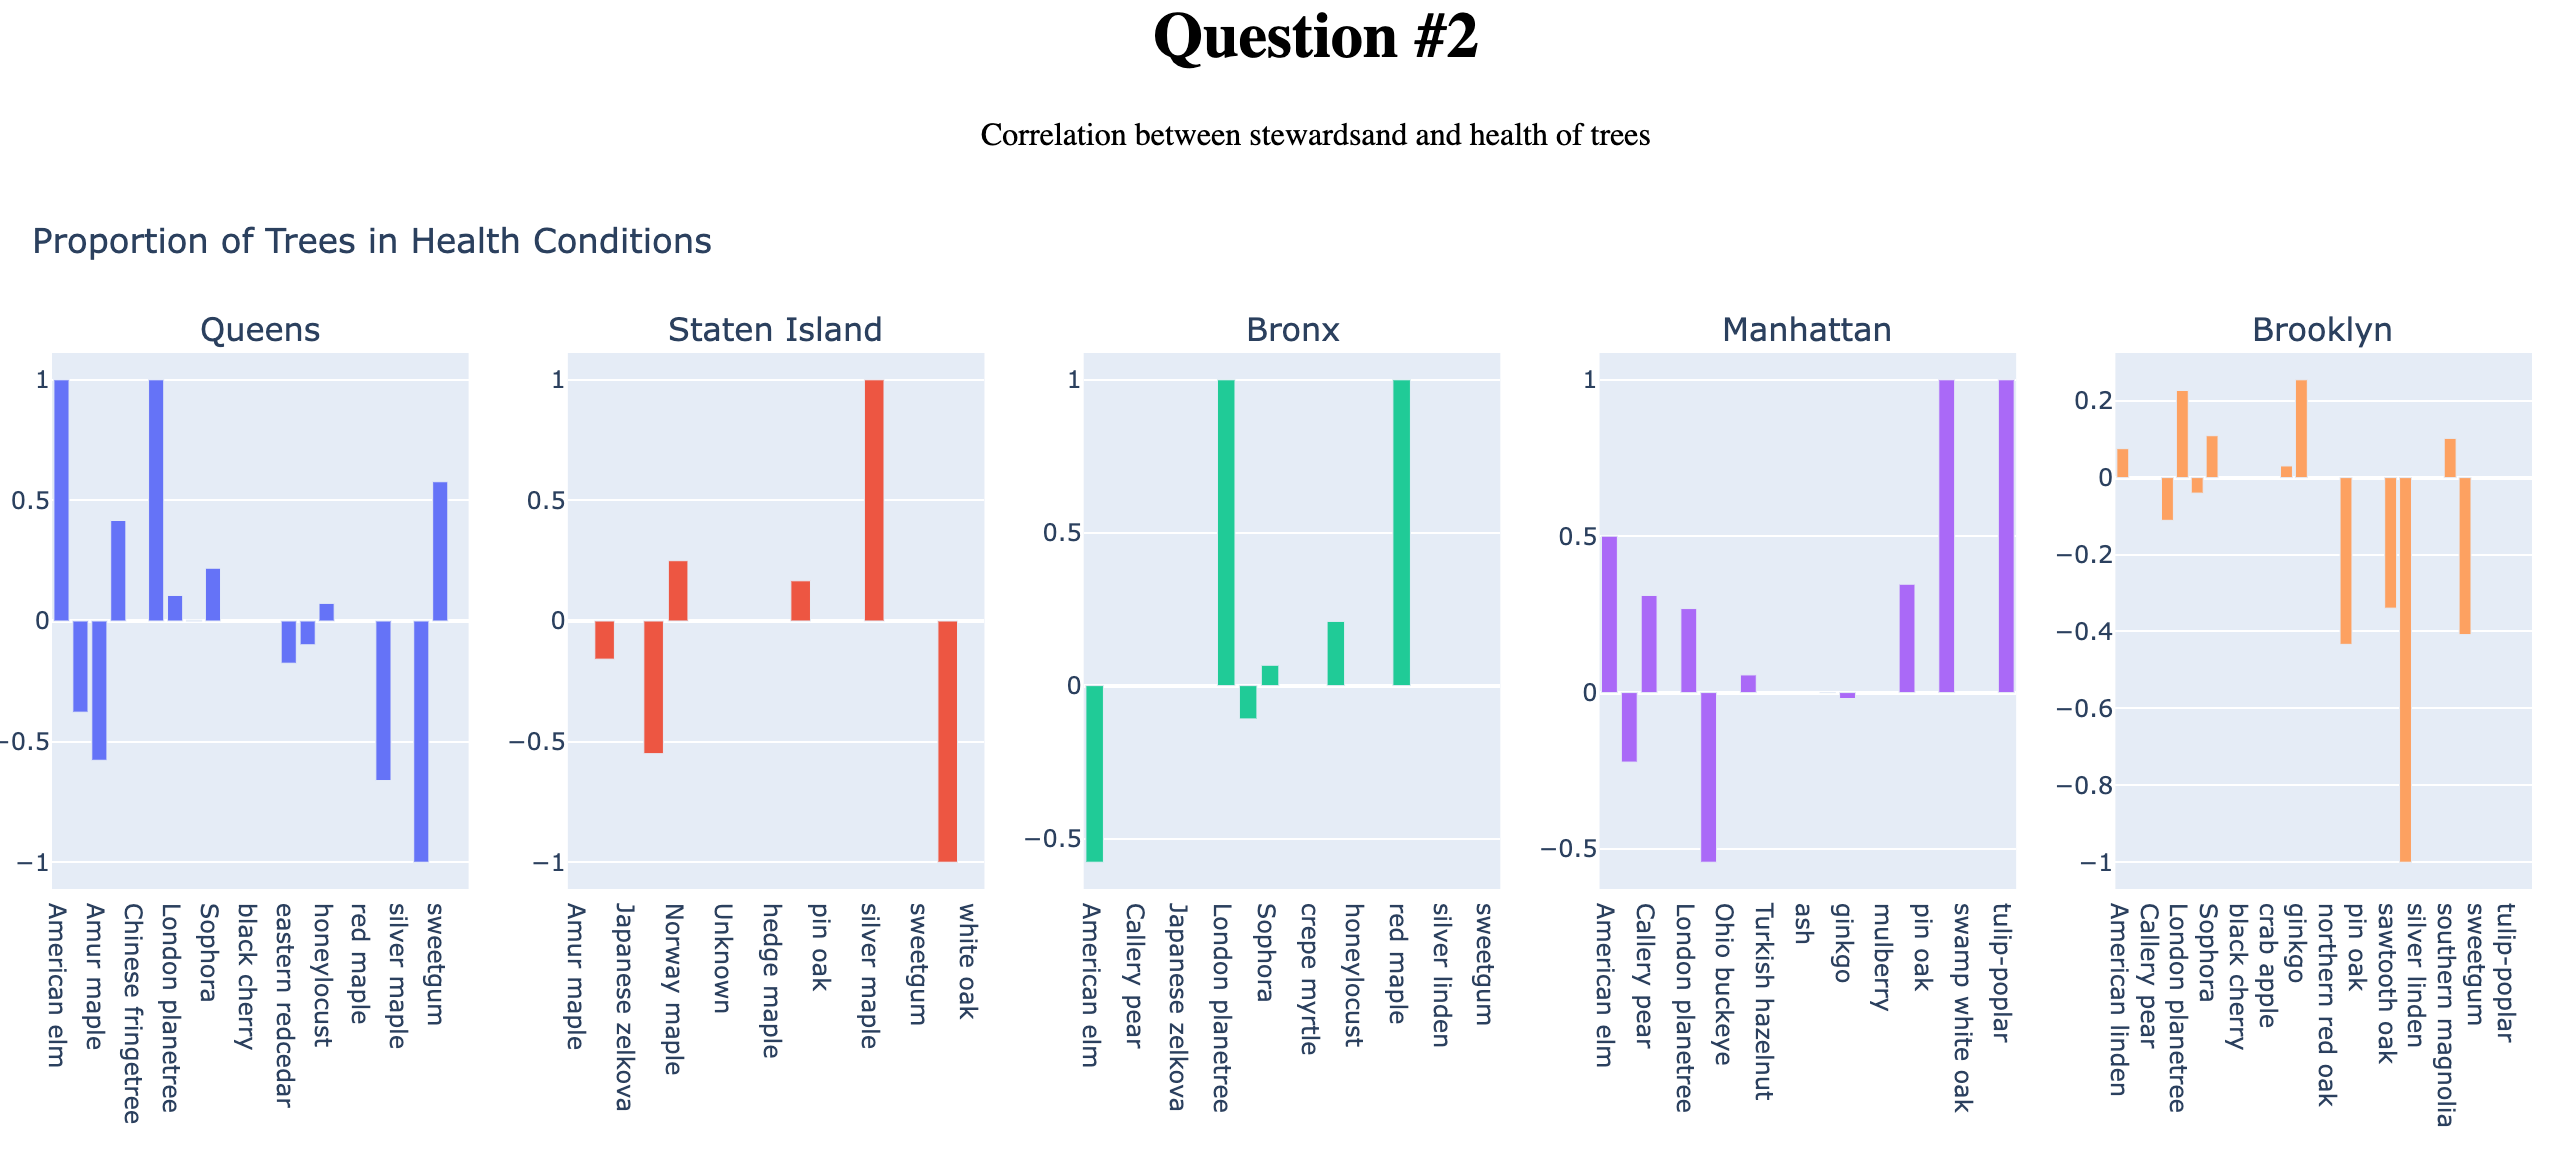